<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/preprocessing_and_decomposition/Orthogonal_Matching_Pursuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Orthogonal Matching Pursuit

## Introduction

Orthogonal Matching Pursuit (OMP) is a method of sparse signal approximation which finds the "best matching" projections of multidimensional data onto the span of an over-complete (i.e., redundant) dictionary D. It is based on a greedy algorithm that includes at each step the atom most highly correlated with the current residual. Matching pursuit (MP), the most used greedy algorithm, finds locally the optimal solution that is also close enough to a global optimal solution at each iteration. OMP is similar to the simpler matching pursuit method, but better in that at each iteration, the residual is recomputed using an orthogonal projection on the space of the previously chosen dictionary elements.

A more in-depth explanation of OMP can be found here: https://medium.com/@venali/conventional-guide-to-supervised-learning-with-scikit-learn-orthogonal-matching-pursuit-omp-d3de1ffef841

## Code Example

In [2]:
import pandas as pd
## example data importing
data = pd.read_csv('https://raw.githubusercontent.com/iotanalytics/IoTTutorial/main/data/SCG_data.csv').drop('Unnamed: 0',1).to_numpy()[10,:1000]

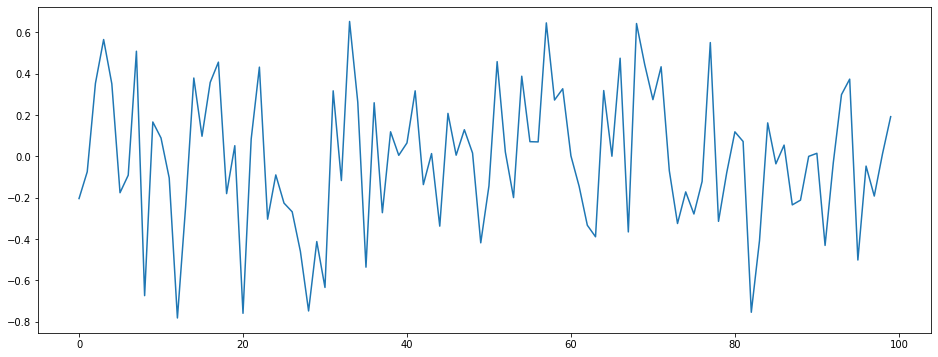

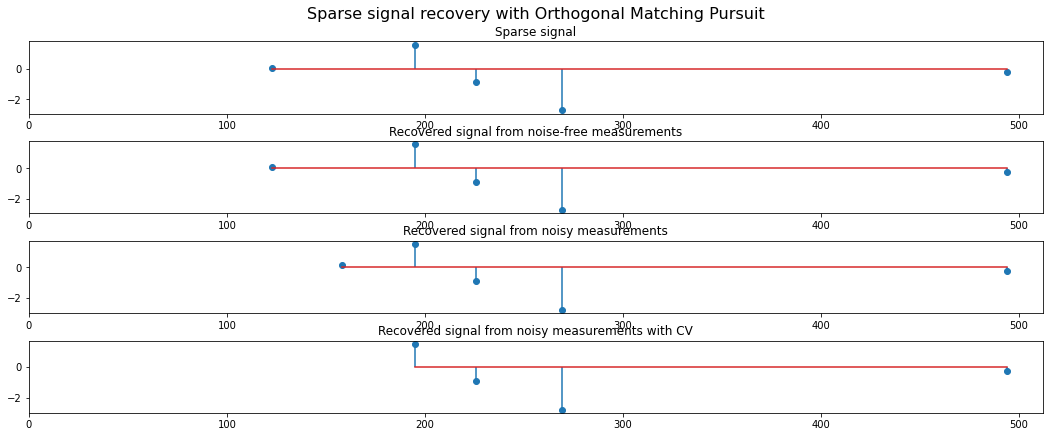

In [10]:
# This example: https://scikit-learn.org/stable/auto_examples/linear_model/plot_omp.html#sphx-glr-auto-examples-linear-model-plot-omp-py

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.datasets import make_sparse_coded_signal

n_components, n_features = 512, 100
n_nonzero_coefs = 5

# generate the data

# y = Xw
# |x|_0 = n_nonzero_coefs

y, X, w = make_sparse_coded_signal(n_samples=1,
                                   n_components=n_components,
                                   n_features=n_features,
                                   n_nonzero_coefs=n_nonzero_coefs,
                                   random_state=0)

idx, = w.nonzero()


# distort the clean signal
y_noisy = y + 0.05 * np.random.randn(len(y))

plt.figure(figsize=(16,6))
plt.plot(y_noisy)


# plot the sparse signal
plt.figure(figsize=(16, 6))
plt.subplot(4, 1, 1)
plt.xlim(0, 512)
plt.title("Sparse signal")
plt.stem(idx, w[idx], use_line_collection=True)

# plot the noise-free reconstruction
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp.fit(X, y)
coef = omp.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 2)
plt.xlim(0, 512)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

# plot the noisy reconstruction
omp.fit(X, y_noisy)
coef = omp.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 3)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

# plot the noisy reconstruction with number of non-zeros set by CV
omp_cv = OrthogonalMatchingPursuitCV()
omp_cv.fit(X, y_noisy)
coef = omp_cv.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 4)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements with CV")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

plt.subplots_adjust(0.06, 0.04, 0.94, 0.90, 0.20, 0.38)
plt.suptitle('Sparse signal recovery with Orthogonal Matching Pursuit',
             fontsize=16)
plt.show()

## Discussion

Pros:

Orthogonal Matching Pursuit outperforms matching pursuit by updating all activated coefficients simultaneously in generating the orthogonal projection of the selected dictionary functions at every iteration.

Other direct approaches to sparse approximation, such as combinatorial optimization, are complex and require important computational resources to perform the approximation than OMP.

Cons:

Orthogonal Matching Pursuit, however, requires more computational resources then Matching Pursuit due to extra calculations.

The dictionary needs to be made beforehand, as well as it needs to be made overcomplete (or sometimes redundant). Because the vectors in the dictionary are not a linearly independent set, the signal representation in the dictionary is not unique. However, by creating a redundant dictionary, you can expand your signal in a set of vectors that adapt to the time-frequency or time-scale characteristics of your signal.